## Autograd: 自动求导机制
PyTorch 中所有神经网络的核心是 autograd 包。 我们先简单介绍一下这个包，然后训练第一个简单的神经网络。

autograd包为张量上的所有操作提供了自动求导。 它是一个在运行时定义的框架，这意味着反向传播是根据你的代码来确定如何运行，并且每次迭代可以是不同的。



## 张量（Tensor）
torch.Tensor是这个包的核心类。如果设置 .requires_grad 为 True，那么将会追踪所有对于该张量的操作。 当完成计算后通过调用 .backward()，自动计算所有的梯度， 这个张量的所有梯度将会自动积累到 .grad 属性。

要阻止张量跟踪历史记录，可以调用.detach()方法将其与计算历史记录分离，并禁止跟踪它将来的计算记录。

为了防止跟踪历史记录（和使用内存），可以将代码块包装在with torch.no_grad()：中。 在评估模型时特别有用，因为模型可能具有requires_grad = True的可训练参数，但是我们不需要梯度计算。

在自动梯度计算中还有另外一个重要的类Function.

Tensor and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a .grad_fn attribute that references a Function that has created the Tensor (except for Tensors created by the user - their grad_fn is None).

Tensor 和 Function互相连接并生成一个非循环图，它表示和存储了完整的计算历史。 每个张量都有一个.grad_fn属性，这个属性引用了一个创建了Tensor的Function（除非这个张量是用户手动创建的，即，这个张量的 grad_fn 是 None）。

如果需要计算导数，你可以在Tensor上调用.backward()。 如果Tensor是一个标量（即它包含一个元素数据）则不需要为backward()指定任何参数， 但是如果它有更多的元素，你需要指定一个gradient 参数来匹配张量的形状。


In [1]:
import torch

创建一个张量并设置 requires_grad=True 用来追踪他的计算历史

In [2]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [6]:
# 对张量进行操作:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


结果y已经被计算出来了，所以，grad_fn已经被自动生成了。

In [8]:
print(y.grad_fn)

In [11]:
z = y * y * 3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


.requires_grad_( ... ) 可以改变现有张量的 requires_grad属性。 如果没有指定的话，默认输入的flag是 False。


In [12]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


## 梯度
反向传播 因为 out是一个纯量（scalar），out.backward() 等于out.backward(torch.tensor(1))。

In [13]:
out.backward()

In [14]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


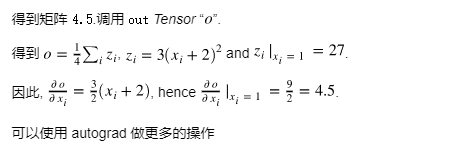

In [23]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-938.6389,  199.9107,  957.9966], grad_fn=<MulBackward0>)


In [24]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


如果.requires_grad=True但是你又不希望进行autograd的计算， 那么可以将变量包裹在 with torch.no_grad()中:

In [26]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False
